In [1]:
import os
if not os.path.isdir('database'):
    os.chdir("..")

In [2]:
import pandas as pd

from utils import technical

In [3]:
currency_pair = "xrpeur"
df = pd.read_pickle(f"database/{currency_pair}.pkl")

### Moving average

In [4]:
df.close.plot()
df.close.rolling(5000).mean().plot()

### MACD example
With getgains=True returns the percentage gains

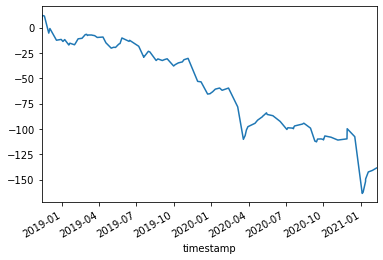

In [5]:
# there are duplicate indexes
df = df.drop(df[df.index.duplicated()].index)
technical.macd(df.close, 10000, 1000, getgains=True, commissions=0.005).cumsum().plot()

### Ultimate oscillator

Ultimate is good, but is also very sensible and the commissions play a strong role

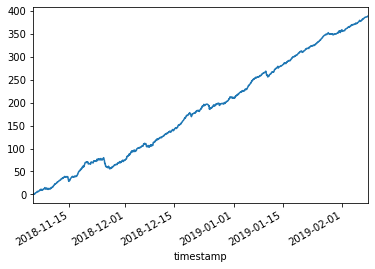

In [6]:
technical.ultimate(df.close, df.low, df.high, buylevel=20, selllevel=80, days=7, getgains=True, commissions=0).cumsum().plot()

### Bollinger bands

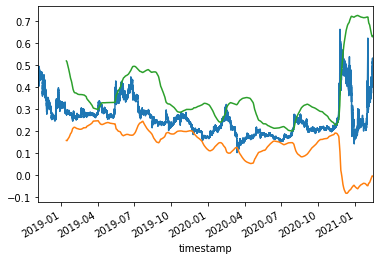

In [7]:
df.close.plot()
lower, upper = technical.bollinger_bands(df.close, k=3, period=100000)
lower.plot()
upper.plot()

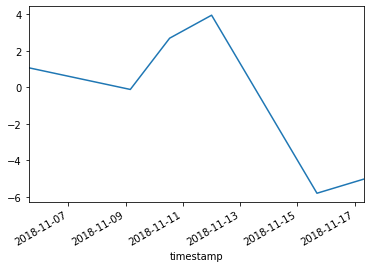

In [8]:
technical.bollinger_bands(df.close, k=2, period=1000, getgains=True, commissions=0).cumsum().plot()

### Policy combination

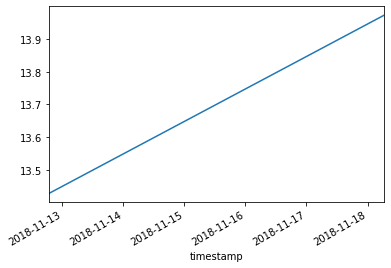

In [9]:
macd = technical.macd(df.close, 10000, 1000)
lower, upper = technical.bollinger_bands(df.close, k=1, period=1000)
buy = (macd < 0) & (df.close < lower)
sell = (macd > 0) & (df.close > upper)
policy = technical.getpolicy(buy, sell)
technical.gains(prices=df.close, policy=policy).cumsum().plot()